# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV149"

In [3]:
LV_AXIS_THRESHOLD = None  # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP008145, SRP058773, SRP066834, SRP055569, SRP057196, SRP042161, SRP033135, SRP060416, SRP006575, SRP059379, SRP042620, SRP050499, SRP035477, SRP029889, SRP007947, SRP002326, SRP050992, SRP055153, SRP059775, SRP002487, SRP047192, SRP058740, SRP007498, SRP028170, SRP017777, SRP029880, SRP013239, SRP011422, SRP018020, SRP064735, SRP014591, SRP006769, SRP059735, SRP055513, SRP041036, SRP018838, SRP014688, SRP026204, SRP059035, SRP033466, SRP041494, SRP036790, SRP048669, SRP017575, SRP010907, SRP041751, 

In [18]:
lv_data.shape

(6196, 79)

In [19]:
lv_data.head()

treatment   cell line  \
project   run                                                 
SRP008145 SRR342832              DMSO (5 hours)  HEK293T/17   
          SRR342834              DMSO (5 hours)  HEK293T/17   
          SRR342835              DMSO (5 hours)  HEK293T/17   
          SRR342836              DMSO (5 hours)  HEK293T/17   
          SRR342839  100 uM forskolin (5 hours)  HEK293T/17   

                                   sample type       reporter well number  \
project   run                                                               
SRP008145 SRR342832  embyonic kidney cell line  CRE multi-hit         NaN   
          SRR342834  embyonic kidney cell line  CRE multi-hit         NaN   
          SRR342835  embyonic kidney cell line  CRE multi-hit         NaN   
          SRR342836  embyonic kidney cell line  CRE multi-hit         NaN   
          SRR342839  embyonic kidney cell line  CRE multi-hit         NaN   

                    reprogramming time point (day) Stage tissue cell type  \
project   run                                                               
SRP008145 SRR342832                            NaN   NaN    NaN       NaN   
          SRR342834                            NaN   NaN    NaN       NaN   
          SRR342835                            NaN   NaN    NaN       NaN   
          SRR342836                            NaN   NaN    NaN       NaN   
          SRR342839                            NaN   NaN    NaN       NaN   

                     age  ... p/i stimulation donor disease state  \
project   run             ...                                       
SRP008145 SRR342832  NaN  ...             NaN   NaN           NaN   
          SRR342834  NaN  ...             NaN   NaN           NaN   
          SRR342835  NaN  ...             NaN   NaN           NaN   
          SRR342836  NaN  ...             NaN   NaN           NaN   
          SRR342839  NaN  ...             NaN   NaN           NaN   

                    stromal signature prognosis infected with  \
project   run                                                   
SRP008145 SRR342832               NaN       NaN           NaN   
          SRR342834               NaN       NaN           NaN   
          SRR342835               NaN       NaN           NaN   
          SRR342836               NaN       NaN           NaN   
          SRR342839               NaN       NaN           NaN   

                    time post infection molecule type passage     LV149  
project   run                                                            
SRP008145 SRR342832                 NaN           NaN     NaN -0.031576  
          SRR342834                 NaN           NaN     NaN  0.736388  
          SRR342835                 NaN           NaN     NaN  0.515692  
          SRR342836                 NaN           NaN     NaN  0.548193  
          SRR342839                 NaN           NaN     NaN -0.069540  

[5 rows x 79 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

reporter                          4.642476
sample type                       3.366972
treatment                         0.211590
cell line                         0.136595
well number                       0.003894
reprogramming time point (day)    0.003894
experiment_sample_name            0.001876
c1 chip id                        0.001876
reprogramming vector              0.001875
time                              0.001875
iPSc                              0.001875
Stage                             0.001827
age                               0.001803
antibodies                        0.001365
origin                            0.001365
tissue                            0.001327
culture medium                    0.001082
antibody manufacturer             0.001082
tonsil donor                      0.000854
facs gating                       0.000854
dtype: float64

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

tissue          0.001327
cell type       0.000663
cell subtype    0.000440
dtype: float64

In [22]:
_tmp = lv_data.loc[
    :,
    [
        "tissue",
        "cell type",
        "cell subtype",
        "cell line",
        LV_NAME,
    ],
]

In [23]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [24]:
_tmp_seq[0]

tissue  \
project   run                                                             
SRP008145 SRR342849                                                 NaN   
          SRR342848                                                 NaN   
          SRR342850                                                 NaN   
          SRR342862                                                 NaN   
          SRR342861                                                 NaN   
          SRR342846                                                 NaN   
          SRR342842                                                 NaN   
          SRR342843                                                 NaN   
          SRR342841                                                 NaN   
          SRR342834                                                 NaN   
          SRR342857                                                 NaN   
          SRR342836                                                 NaN   
          SRR342835                                                 NaN   
SRP058773 SRR2042650                                                NaN   
SRP066834 SRR2967772                                    Fetal neocortex   
SRP008145 SRR342858                                                 NaN   
SRP066834 SRR2967807                                    Fetal neocortex   
SRP055569 SRR1821498                                                NaN   
SRP066834 SRR2967449  Microdissected cortical-like ventricle from ce...   
          SRR2967780                                    Fetal neocortex   
SRP057196 SRR1974557                                             cortex   
SRP042161 SRR1294526                                                NaN   
SRP033135 SRR1033250                                                NaN   
SRP057196 SRR1974606                                             cortex   
          SRR1974857                                             cortex   

                                                              cell type  \
project   run                                                             
SRP008145 SRR342849                                                 NaN   
          SRR342848                                                 NaN   
          SRR342850                                                 NaN   
          SRR342862                                                 NaN   
          SRR342861                                                 NaN   
          SRR342846                                                 NaN   
          SRR342842                                                 NaN   
          SRR342843                                                 NaN   
          SRR342841                                                 NaN   
          SRR342834                                                 NaN   
          SRR342857                                                 NaN   
          SRR342836                                                 NaN   
          SRR342835                                                 NaN   
SRP058773 SRR2042650                                                NaN   
SRP066834 SRR2967772                                                NaN   
SRP008145 SRR342858                                                 NaN   
SRP066834 SRR2967807                                                NaN   
SRP055569 SRR1821498  mixture of U87 human glioma cells and MCF10a h...   
SRP066834 SRR2967449                                                NaN   
          SRR2967780                                                NaN   
SRP057196 SRR1974557                                         astrocytes   
SRP042161 SRR1294526                                       Glioblastoma   
SRP033135 SRR1033250             Human Skeletal Muscle Myoblasts (HSMM)   
SRP057196 SRR1974606                                          microglia   
          SRR1974857                                         astrocytes   

             

In [27]:
# what is there in these projects?
lv_data.loc[["SRP008145"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

treatment   cell line  \
project   run                                                        
SRP008145 SRR342849         100 uM forskolin (5 hours)  HEK293T/17   
          SRR342848         100 uM forskolin (5 hours)  HEK293T/17   
          SRR342850         100 uM forskolin (5 hours)  HEK293T/17   
          SRR342862  Sendai virus (MOI = 10, 16 hours)  HEK293T/17   
          SRR342861  Sendai virus (MOI = 10, 16 hours)  HEK293T/17   
          SRR342846         100 uM forskolin (5 hours)  HEK293T/17   
          SRR342842         100 uM forskolin (5 hours)  HEK293T/17   
          SRR342843         100 uM forskolin (5 hours)  HEK293T/17   
          SRR342841         100 uM forskolin (5 hours)  HEK293T/17   
          SRR342834                     DMSO (5 hours)  HEK293T/17   

                                   sample type         reporter     LV149  
project   run                                                              
SRP008145 SRR342849  embyonic kidney cell line   CRE single-hit  6.585554  
          SRR342848  embyonic kidney cell line   CRE single-hit  6.288785  
          SRR342850  embyonic kidney cell line   CRE single-hit  5.328337  
          SRR342862  embyonic kidney cell line  IFNB single-hit  2.274500  
          SRR342861  embyonic kidney cell line  IFNB single-hit  2.161695  
          SRR342846  embyonic kidney cell line   CRE single-hit  1.283884  
          SRR342842  embyonic kidney cell line    CRE multi-hit  0.999218  
          SRR342843  embyonic kidney cell line    CRE multi-hit  0.975461  
          SRR342841  embyonic kidney cell line    CRE multi-hit  0.897710  
          SRR342834  embyonic kidney cell line    CRE multi-hit  0.736388

In [28]:
SELECTED_ATTRIBUTE = "cell line"

In [29]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue", "cell type"]

## Get plot data

In [87]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [88]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [89]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [90]:
plot_data.head(20)

cell line  \
project   run                                                             
SRP008145 SRR342849                                          HEK293T/17   
          SRR342848                                          HEK293T/17   
          SRR342850                                          HEK293T/17   
          SRR342862                                          HEK293T/17   
          SRR342861                                          HEK293T/17   
          SRR342846                                          HEK293T/17   
          SRR342842                                          HEK293T/17   
          SRR342843                                          HEK293T/17   
          SRR342841                                          HEK293T/17   
          SRR342834                                          HEK293T/17   
          SRR342857                                          HEK293T/17   
          SRR342836                                          HEK293T/17   
          SRR342835                                          HEK293T/17   
SRP058773 SRR2042650                                    NOT CATEGORIZED   
SRP066834 SRR2967772                                    Fetal neocortex   
SRP008145 SRR342858                                          HEK293T/17   
SRP066834 SRR2967807                                    Fetal neocortex   
SRP055569 SRR1821498  mixture of U87 human glioma cells and MCF10a h...   
SRP066834 SRR2967449  Microdissected cortical-like ventricle from ce...   
          SRR2967780                                    Fetal neocortex   

                         LV149  
project   run                   
SRP008145 SRR342849   6.585554  
          SRR342848   6.288785  
          SRR342850   5.328337  
          SRR342862   2.274500  
          SRR342861   2.161695  
          SRR342846   1.283884  
          SRR342842   0.999218  
          SRR342843   0.975461  
          SRR342841   0.897710  
          SRR342834   0.736388  
          SRR342857   0.697178  
          SRR342836   0.548193  
          SRR342835   0.515692  
SRP058773 SRR2042650  0.404412  
SRP066834 SRR2967772  0.358084  
SRP008145 SRR342858   0.324433  
SRP066834 SRR2967807  0.298721  
SRP055569 SRR1821498  0.283303  
SRP066834 SRR2967449  0.269555  
          SRR2967780  0.266763

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [91]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "human bone marrow sample": "bone marrow",
            # "whole blood": "Whole blood",
            # "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            "": "",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            # "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            # "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [92]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [93]:
_srp_code = "SRP008145"

_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"{lv_data.loc[(_srp_code, x.name), 'sample type']} "
    + "(CRE/IFNB " + f"{lv_data.loc[(_srp_code, x.name), 'reporter'].split(' ')[1]}" + ")",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [94]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [95]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [96]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [97]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [98]:
len(attr_order)

15

In [99]:
attr_order[:5]

['embyonic kidney cell line (CRE/IFNB single-hit)',
 'embyonic kidney cell line (CRE/IFNB multi-hit)',
 'X666',
 'nasopharyngeal carcinoma',
 'Hela']

## Plot

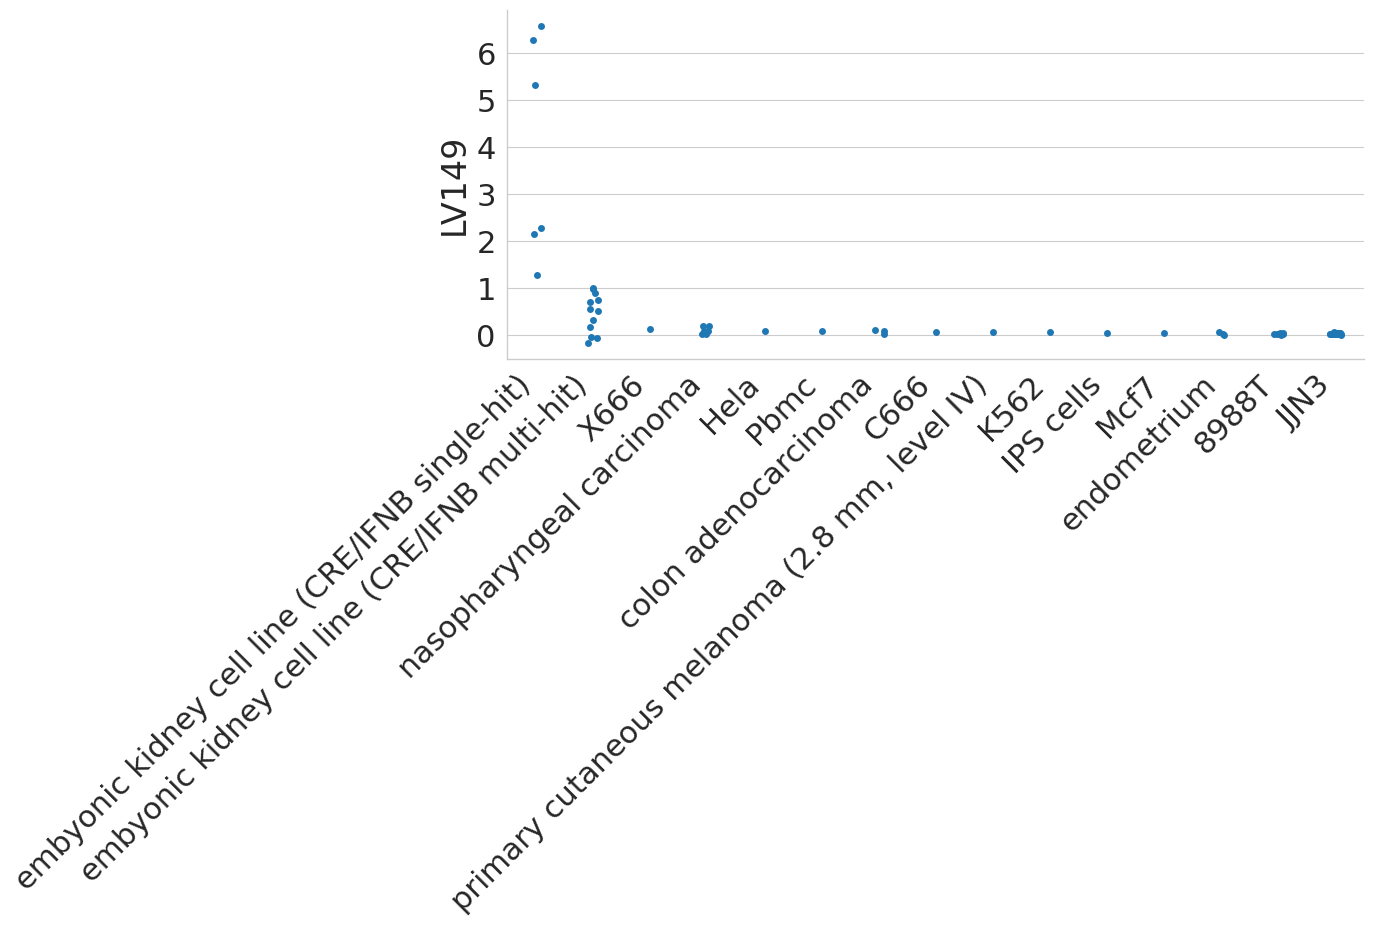

In [100]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [140]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [107]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("CRE")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

cell line     LV149
project   run                                                                 
SRP008145 SRR342849  embyonic kidney cell line (CRE/IFNB single-hit)  6.585554
          SRR342848  embyonic kidney cell line (CRE/IFNB single-hit)  6.288785
          SRR342850  embyonic kidney cell line (CRE/IFNB single-hit)  5.328337
          SRR342862  embyonic kidney cell line (CRE/IFNB single-hit)  2.274500
          SRR342861  embyonic kidney cell line (CRE/IFNB single-hit)  2.161695
          SRR342846  embyonic kidney cell line (CRE/IFNB single-hit)  1.283884
          SRR342842   embyonic kidney cell line (CRE/IFNB multi-hit)  0.999218
          SRR342843   embyonic kidney cell line (CRE/IFNB multi-hit)  0.975461
          SRR342841   embyonic kidney cell line (CRE/IFNB multi-hit)  0.897710
          SRR342834   embyonic kidney cell line (CRE/IFNB multi-hit)  0.736388
          SRR342857   embyonic kidney cell line (CRE/IFNB multi-hit)  0.697178
          SRR342836   embyonic kidney cell line (CRE/IFNB multi-hit)  0.548193
          SRR342835   embyonic kidney cell line (CRE/IFNB multi-hit)  0.515692
          SRR342858   embyonic kidney cell line (CRE/IFNB multi-hit)  0.324433
          SRR342854   embyonic kidney cell line (CRE/IFNB multi-hit)  0.167121
          SRR342832   embyonic kidney cell line (CRE/IFNB multi-hit) -0.031576
          SRR342839   embyonic kidney cell line (CRE/IFNB multi-hit) -0.069540
          SRR342853   embyonic kidney cell line (CRE/IFNB multi-hit) -0.167057

In [103]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP035477"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

cell line  \
project   run                    
SRP035477 SRR1178330      X666   
          SRR1178329      C666   
          SRR1178332     NP460   
          SRR1178331       HK1   

                                                            sample type  \
project   run                                                             
SRP035477 SRR1178330  undifferentiated Epstein-Barr virus (EBV)-posi...   
          SRR1178329  undifferentiated Epstein-Barr virus (EBV)-posi...   
          SRR1178332   immortalized nasopharyngeal epithelial cell line   
          SRR1178331                  well-differentiated NPC cell line   

                         LV149  
project   run                   
SRP035477 SRR1178330  0.124352  
          SRR1178329  0.071878  
          SRR1178332 -0.001003  
          SRR1178331 -0.003624

In [106]:
_tmp.iloc[0]["sample type"]

'undifferentiated Epstein-Barr virus (EBV)-positive NPC xenograft'

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )